# Importing Libraries

In [ ]:
pip install pandas-profiling

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from pandas_profiling import ProfileReport

In [15]:
import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [16]:
data = pd.read_csv('Medicalpremium.csv')

In [17]:
data.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

# EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [19]:
data.describe()

Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%              0.000000  161.000000   67.000000        0.000000   
50%              0.000000  168.000000   75.000000        0.000000   
75%              0.000000  176.000000   87.000000        0.000000   
max              1.000000  188.000000  132.000000        1.000000   

       HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice  
count               986.000000              986.000000    986.000000  
mean                  0.117647                0.667343  24336.713996  
std                   0.322353                0.749205   6248.184382  
min                   0.000000                0.000000  15000.000000  
25%                   0.000000                0.000000  21000.000000  
50%                   0.000000                1.000000  23000.000000  
75%                   0.000000                1.000000  28000.000000  
max                   1.000000                3.000000  40000.000000

In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Medical Insurance")

In [21]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

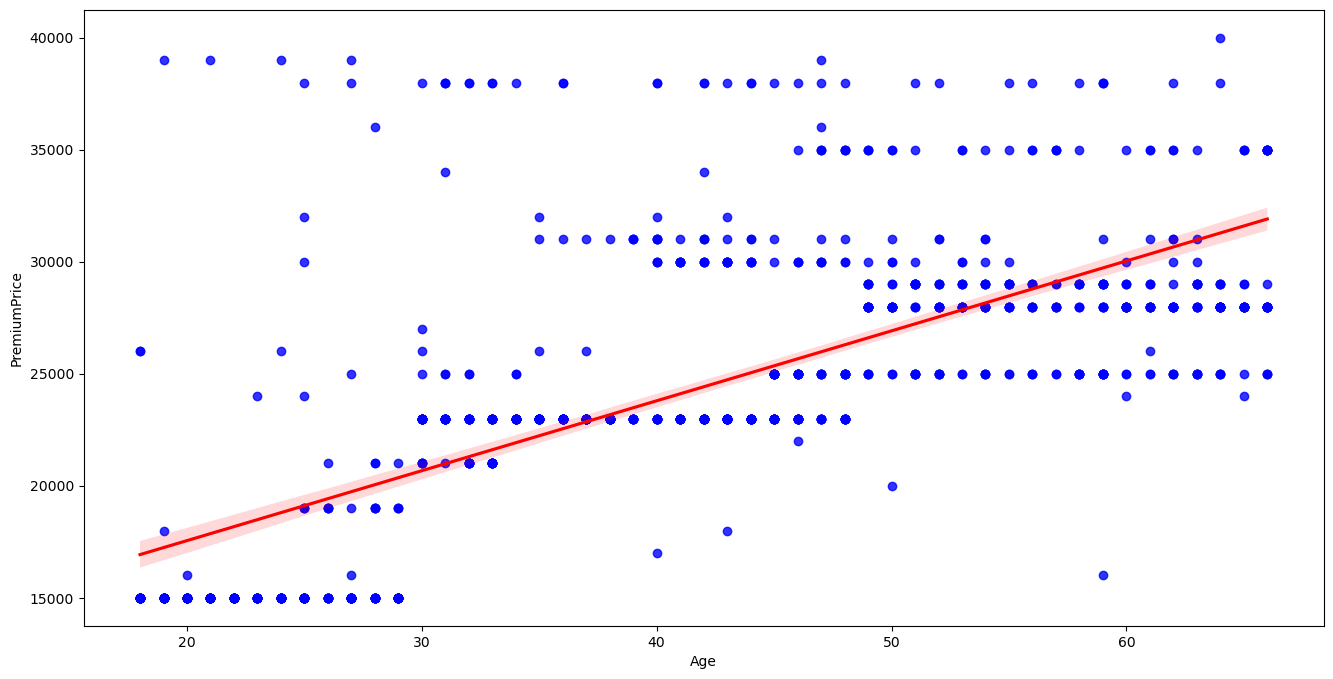

--------------------------------------------------------------------------------------------------------------------------------


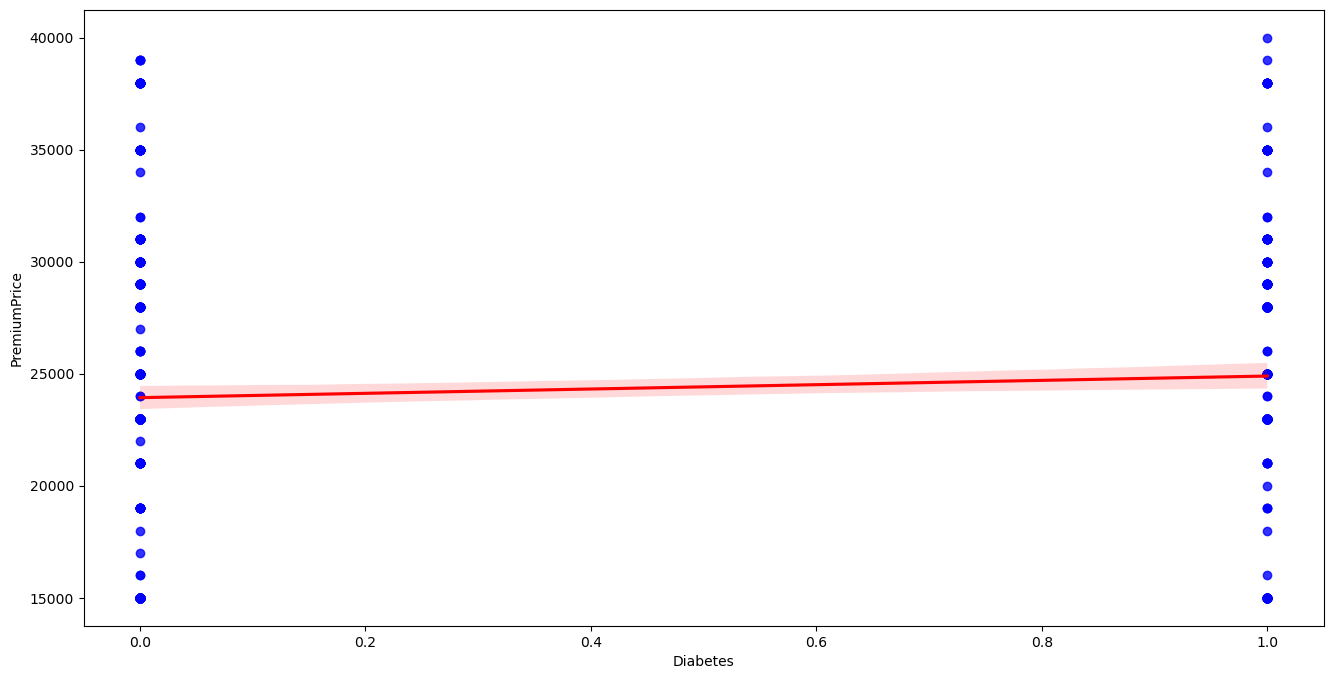

--------------------------------------------------------------------------------------------------------------------------------


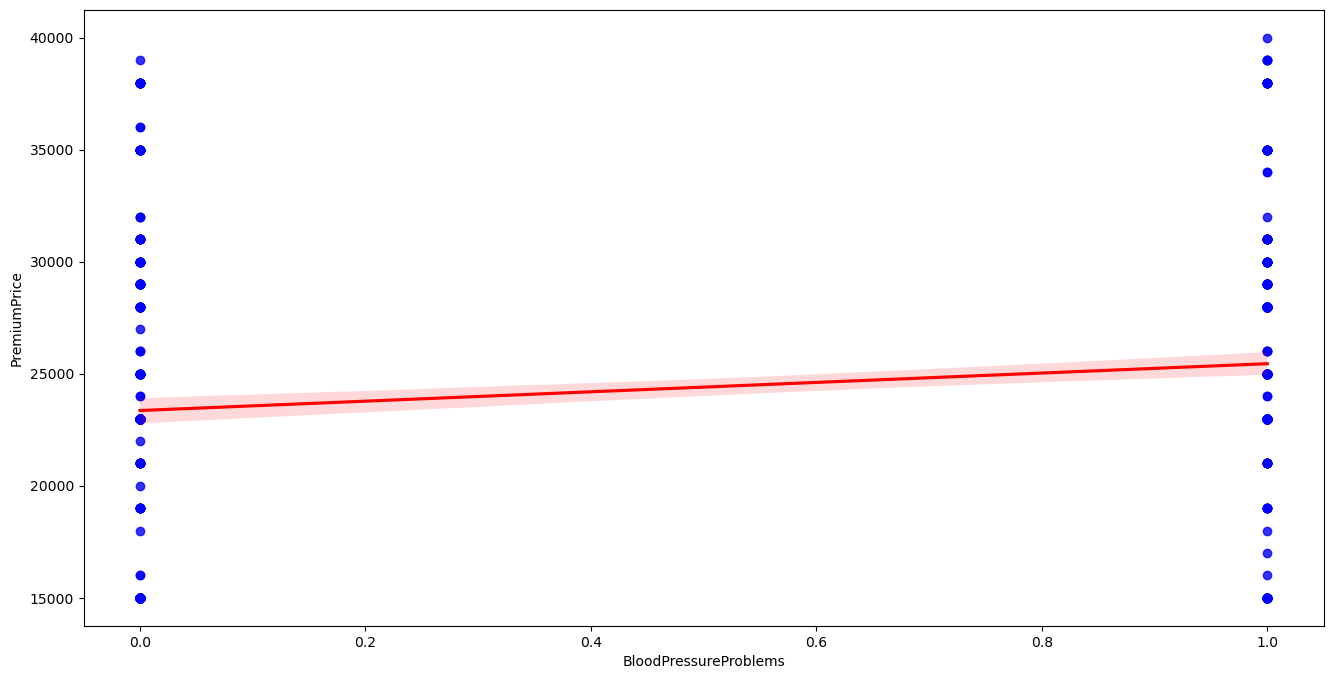

--------------------------------------------------------------------------------------------------------------------------------


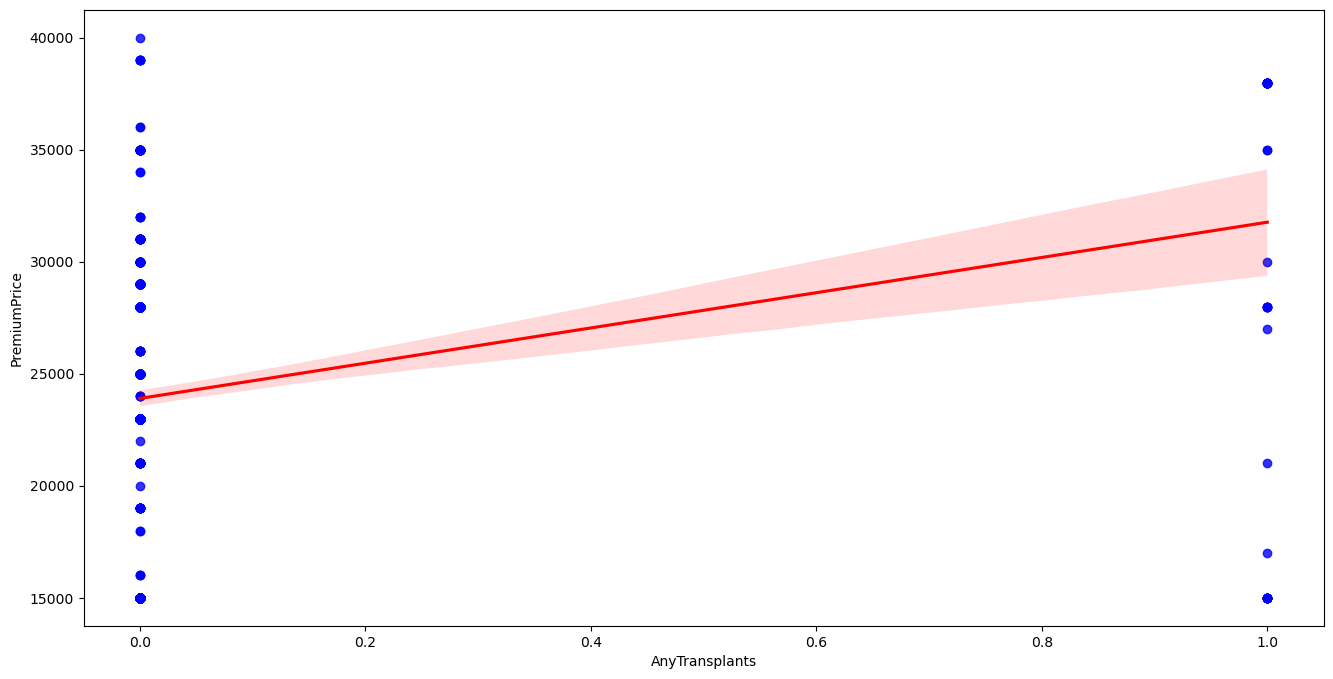

--------------------------------------------------------------------------------------------------------------------------------


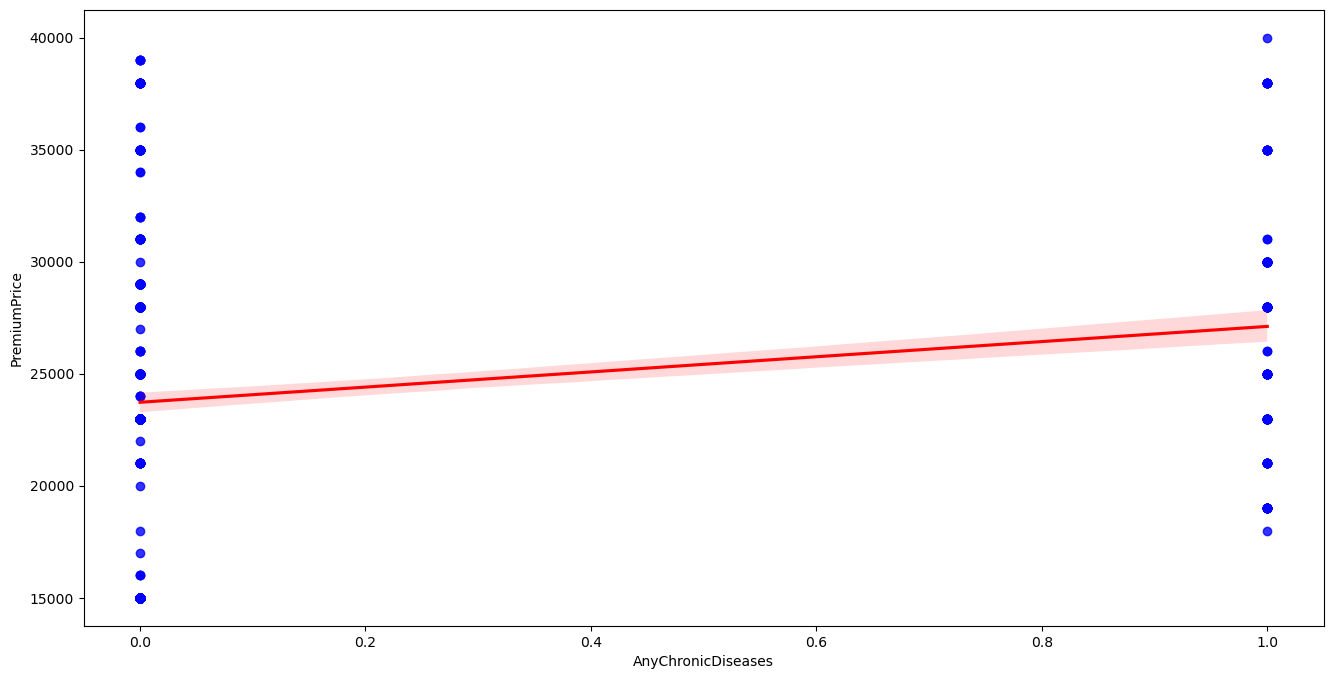

--------------------------------------------------------------------------------------------------------------------------------


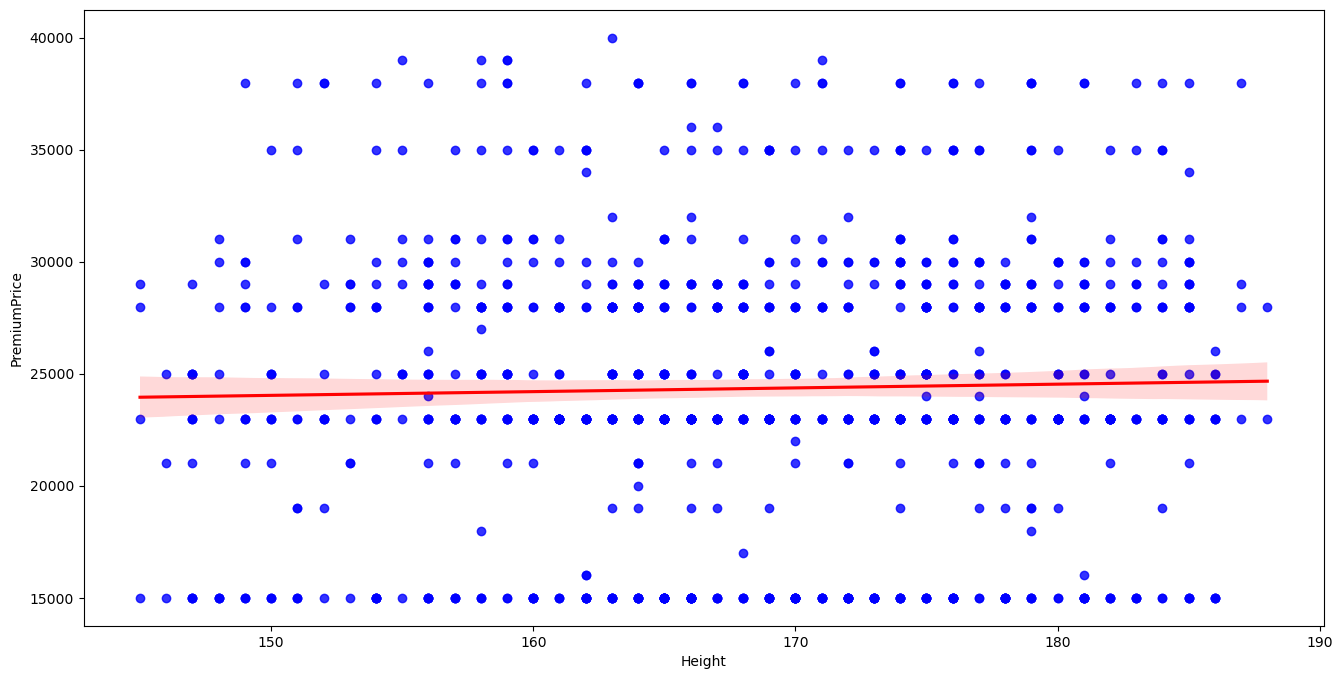

--------------------------------------------------------------------------------------------------------------------------------


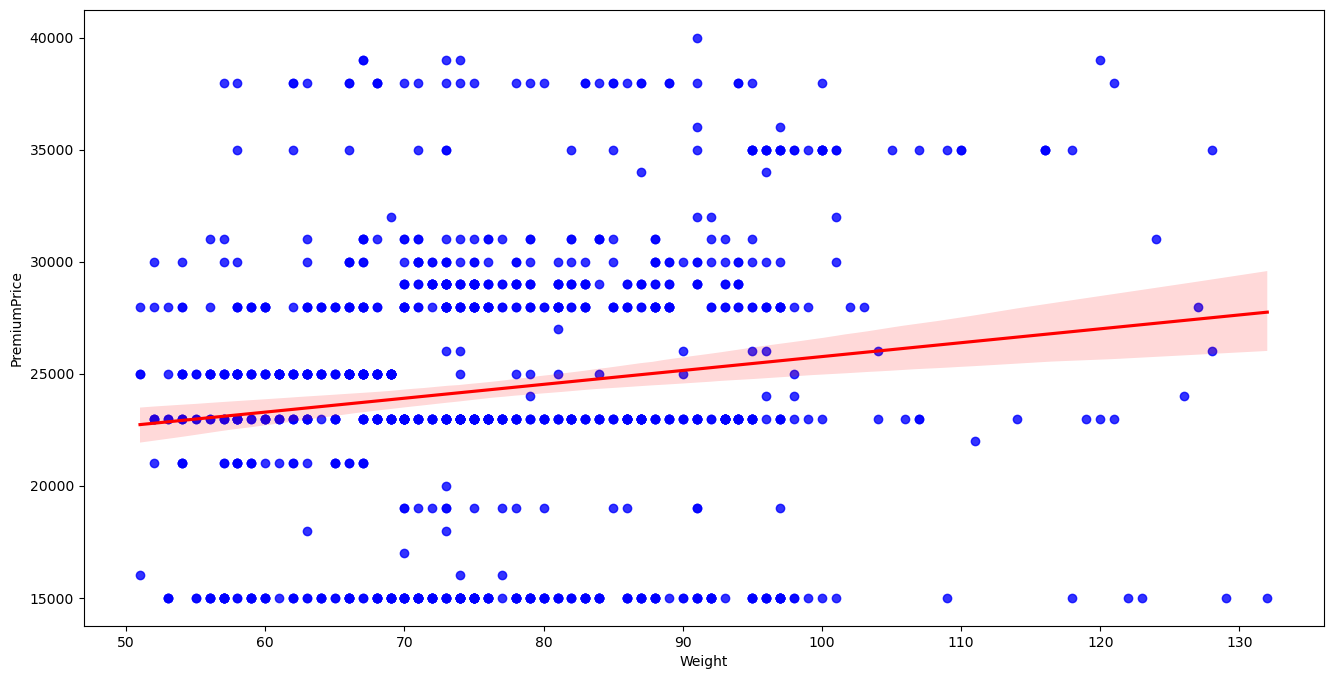

--------------------------------------------------------------------------------------------------------------------------------


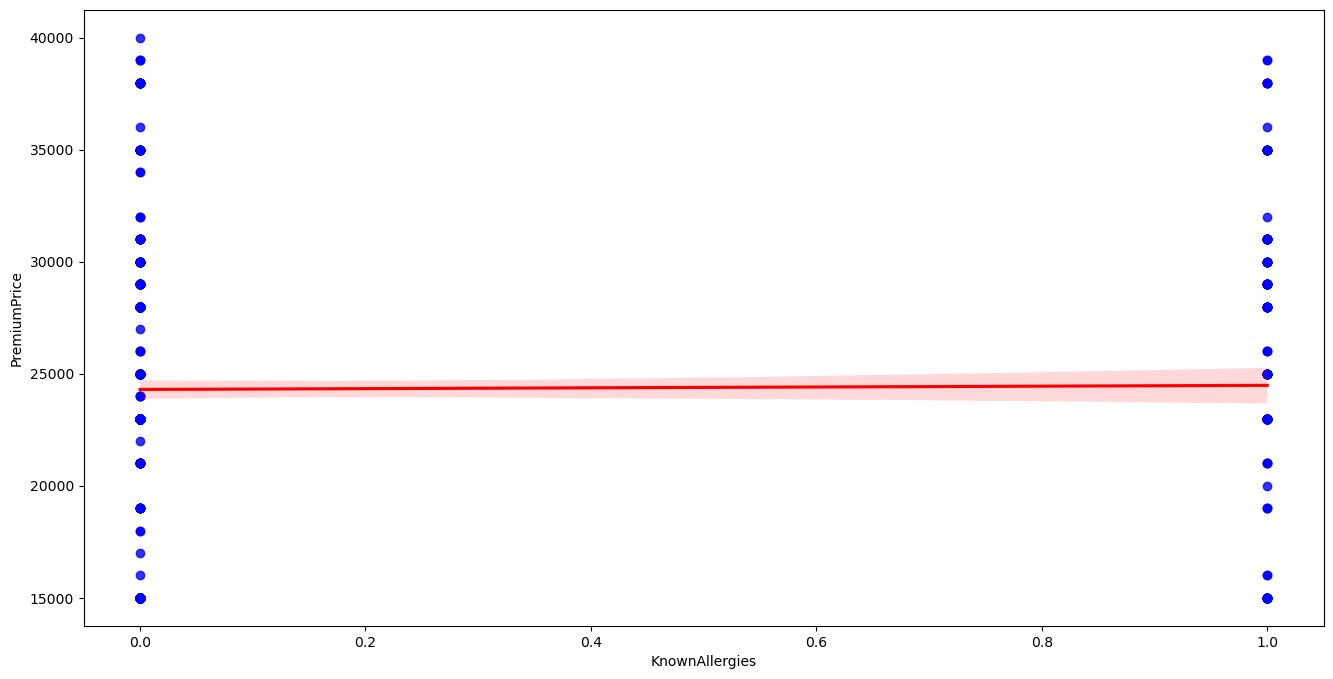

--------------------------------------------------------------------------------------------------------------------------------


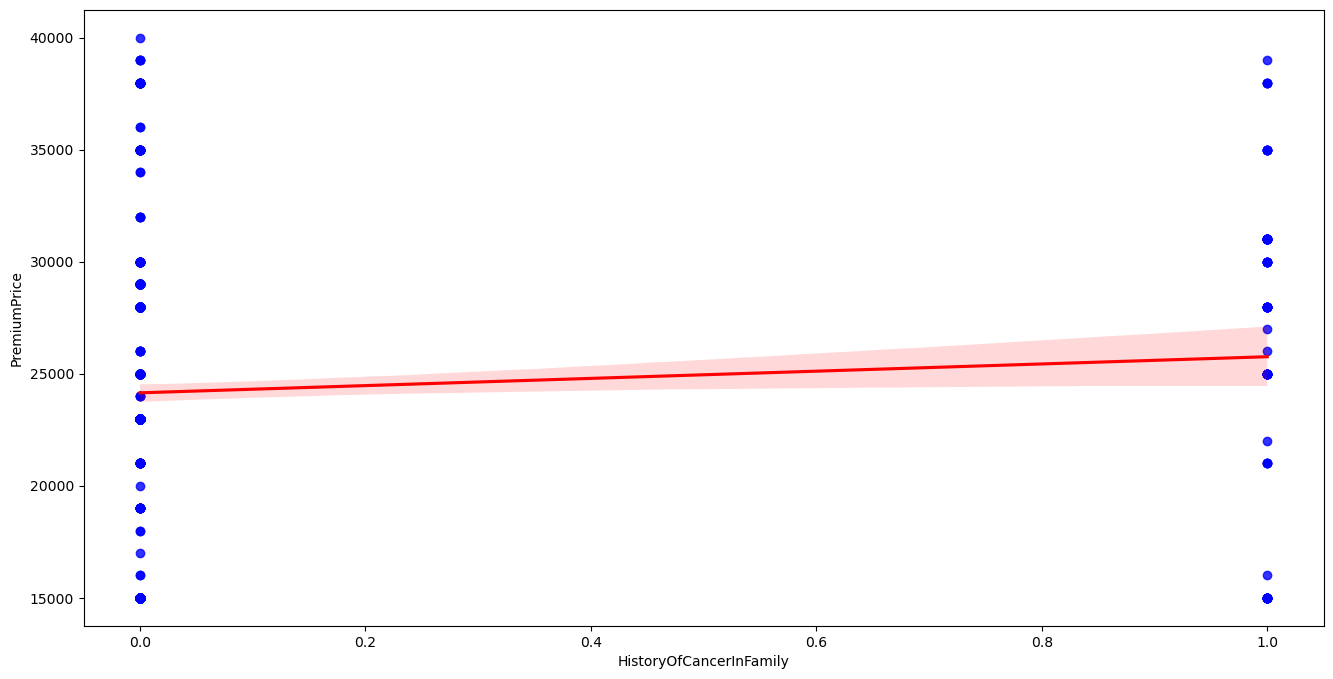

--------------------------------------------------------------------------------------------------------------------------------


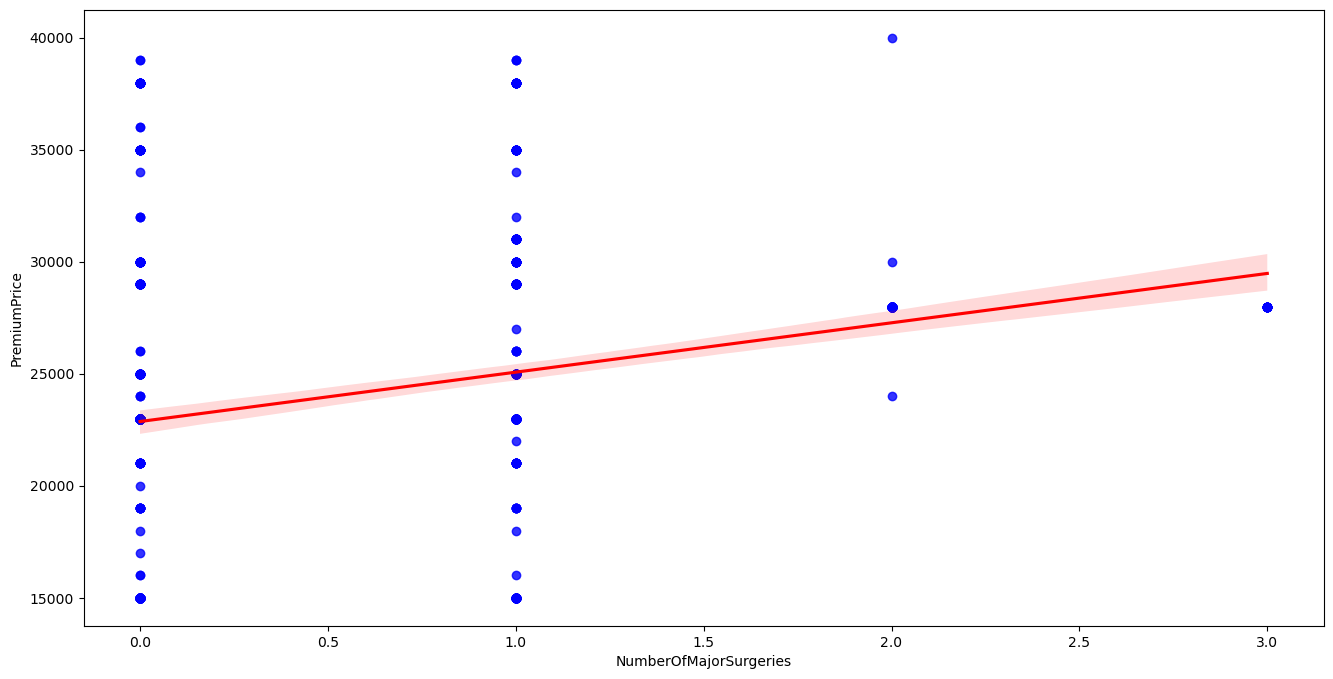

--------------------------------------------------------------------------------------------------------------------------------


In [22]:
# regression plots of price against all features
cols = [col for col in data.columns if col != 'PremiumPrice']
for i in cols:
    plt.figure(figsize =(16,8))
    sns.regplot(x=data[i], y=data.PremiumPrice, data=data,line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
    plt.show()
    print('-'*128)

# Linear Regression Models

The function below will plot the distribution of two inputs.


In [23]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in rupees)')
    plt.ylabel('Proportion of records')

    plt.show()
    plt.close()

In [24]:
rmse_df = pd.DataFrame(columns=['Model', 'RMSE'])

In [25]:
cols = [col for col in data.columns if col != 'PremiumPrice']
X = data[cols]
X.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  
0                       0  
1                       0  
2                       1  
3                       2  
4                       1

In [26]:
y = data['PremiumPrice']
y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 198
Number of training samples: 788


### without Scaling

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",lr.score(X_train, y_train))
print("R^2 on testing data ",lr.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'LR_without_Scaling', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.649208227897174
R^2 on testing data  0.6103687160718128
MSE :  14940119.587350262
RMSE :  3865.2450876173766
R2_score :  0.35303059226984934


### with Scaling

In [29]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'LR_with_Scaling(SS)', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.649208227897174
R^2 on testing data  0.6103687160718128
MSE :  14940119.587350262
RMSE :  3865.2450876173766
R2_score :  0.35303059226985223


From above we can see that there is no difference with and without scaling, so we can continue in either ways

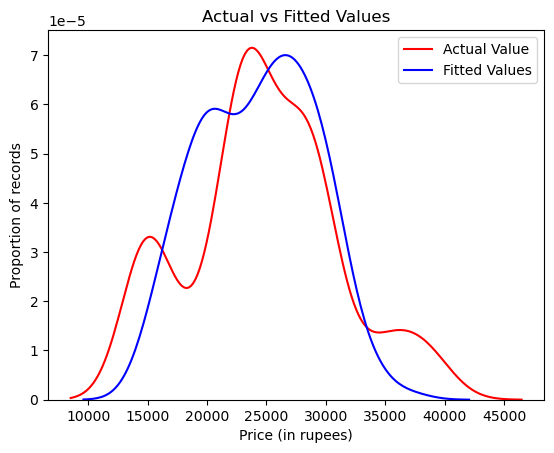

In [30]:
plot_dis(y_test,y_pred)

## Polynomial Regression

In [31]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'LR_PolynomialFeatures(PF)', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.7475410483770701
R^2 on testing data  0.6506204693958032
MSE :  13396696.271342153
RMSE :  3660.1497607805823
R2_score :  0.4648089459976107


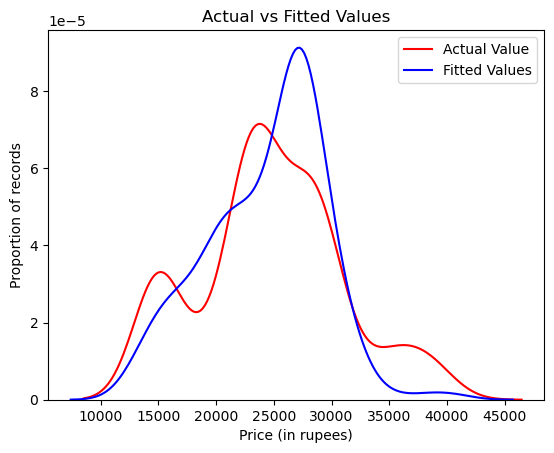

In [32]:
plot_dis(y_test,y_pred)

## Polynomial Regression with StandardScaler, GridSearchCV

In [33]:
Input=[ ('scaler', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)
param_grid = {
    "polynomial__degree": [1,2,3]
}
search = GridSearchCV(pipe, param_grid, n_jobs=1)
pipe.fit(X_train, y_train)
search.fit(X_test, y_test)
best=search.best_estimator_
best

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [34]:
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",best.score(X_train, y_train))
print("R^2 on testing data ",best.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'LR_PF_SS', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.6088293557345723
R^2 on testing data  0.6419750312275256
MSE :  13728199.118898189
RMSE :  3705.1584472054888
R2_score :  0.44230701918750315


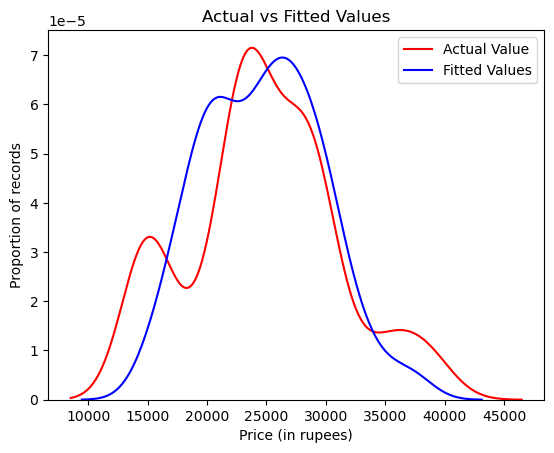

In [35]:
plot_dis(y_test,y_pred)

In [36]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

## Lasso Regression

In [37]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005,0.001,0.01,0.1,1,10, 100])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=3).fit(X_train, y_train)

y_pred = lassoCV.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("alpha : ", lassoCV.alpha_)
print("R^2 on training  data ",lassoCV.score(X_train, y_train))
print("R^2 on testing data ",lassoCV.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'Lasso', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

alpha :  1e-05
R^2 on training  data  0.649208227897174
R^2 on testing data  0.6103687147518126
MSE :  14940119.637964677
RMSE :  3865.245094164751
R2_score :  0.3530305844088578


In [38]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 10 coefficients, 10 are non-zero with Lasso.


## Lasso with Polynomial Features, StandardScaler and GridSearchCV

In [39]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)
param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5, 6],
    "model__alpha":[1e-5, 5e-5, 0.0001, 0.0005,0.001, 0.01, 0.1, 1, 10]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
best=search.best_estimator_
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)
best

best_score_:  0.6284557020674527
best_params_:  {'model__alpha': 1, 'polynomial__degree': 1}


Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=1, tol=0.2))])

In [40]:
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",best.score(X_train, y_train))
print("R^2 on testing data ",best.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'Lasso_PF_SS', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.6491643194746055
R^2 on testing data  0.6106251132158412
MSE :  14930288.231009927
RMSE :  3863.9731146851846
R2_score :  0.3498901559737183


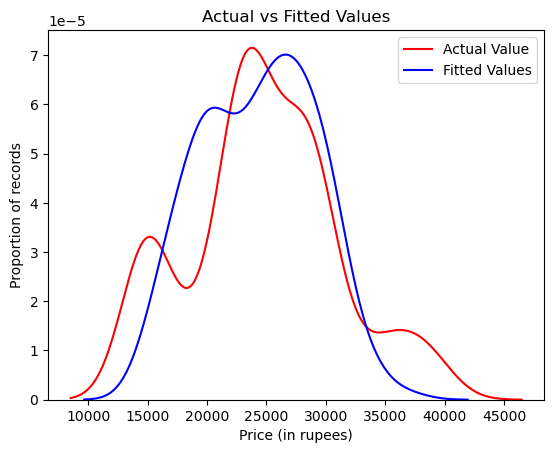

In [41]:
plot_dis(y_test,y_pred)

# Ridge Regression

In [42]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

y_pred = ridgeCV.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("alpha : ", ridgeCV.alpha_)
print("R^2 on training  data ",ridgeCV.score(X_train, y_train))
print("R^2 on testing data ",ridgeCV.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'Ridge', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

alpha :  5.0
R^2 on training  data  0.6483133530715025
R^2 on testing data  0.603404879999739
MSE :  15207142.662742384
RMSE :  3899.633657504559
R2_score :  0.32651758531503694


## Ridge with Polynomial Features, StandardScaler and GridSearchCV

In [43]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)
param_grid = {
    "polynomial__degree": [1,2,3,4,5,6],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
best = search.best_estimator_
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)
best

best_score_:  0.6513917763613517
best_params_:  {'model__alpha': 1, 'polynomial__degree': 2}


Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

In [44]:
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",best.score(X_train, y_train))
print("R^2 on testing data ",best.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'Ridge_PF_SS', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.7460394647030981
R^2 on testing data  0.6564732842494445
MSE :  13172274.471956715
RMSE :  3629.362819002354
R2_score :  0.4652142231204941


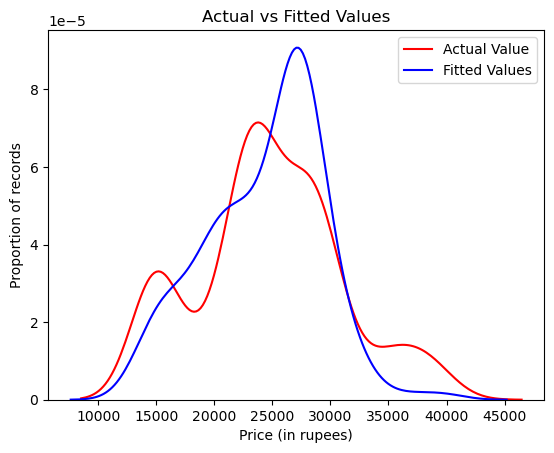

In [45]:
plot_dis(y_test,y_pred)

# ElasticNet

In [46]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)

y_pred = elasticNetCV.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("alpha : ", elasticNetCV.alpha_, "l1_ratio : ",elasticNetCV.l1_ratio_)
print("R^2 on training  data ",elasticNetCV.score(X_train, y_train))
print("R^2 on testing data ",elasticNetCV.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'ElasticNet', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

alpha :  0.01 l1_ratio :  0.7000000000000001
R^2 on training  data  0.6489855207851176
R^2 on testing data  0.6070718451195978
MSE :  15066535.633293923
RMSE :  3881.5635552305366
R2_score :  0.34008443660400023


## ElasticNet with Polynomial Features, StandardScaler and GridSearchCV

In [47]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model', ElasticNet(tol =0.2, alpha=0.1, l1_ratio=0.1))]
pipe = Pipeline(Input)
param_grid = {
    'polynomial__degree': [1, 2, 3,4],
    'model__alpha': [0.0001,0.001,0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
best = search.best_estimator_
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)
best

best_score_:  0.6285767831099175
best_params_:  {'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'polynomial__degree': 1}


Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.1, l1_ratio=0.9, tol=0.2))])

In [48]:
y_pred = best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2 on training  data ",best.score(X_train, y_train))
print("R^2 on testing data ",best.score(X_test,y_test))
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))
print("R2_score : ",r2_score(y_pred, y_test))

new_row = {'Model': 'ElasticNet_PF_SS', 'RMSE': np.sqrt(mse)}
rmse_df = rmse_df.append(new_row, ignore_index=True)

R^2 on training  data  0.6490506503965772
R^2 on testing data  0.6101164865832884
MSE :  14949791.13806359
RMSE :  3866.4959767292644
R2_score :  0.3370168925392494


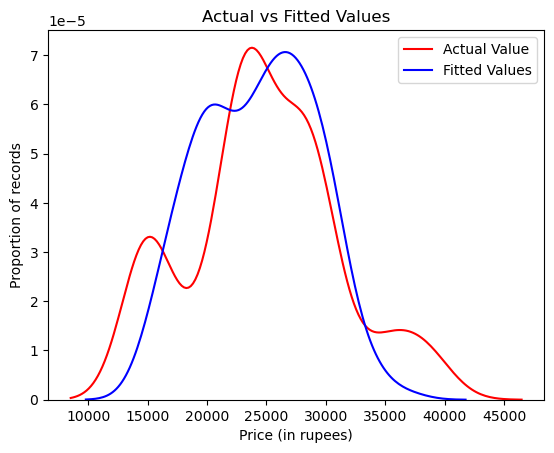

In [49]:
plot_dis(y_test,y_pred)

# Insights

In [50]:
rmse_df

Model         RMSE
0         LR_without_Scaling  3865.245088
1        LR_with_Scaling(SS)  3865.245088
2  LR_PolynomialFeatures(PF)  3660.149761
3                   LR_PF_SS  3705.158447
4                      Lasso  3865.245094
5                Lasso_PF_SS  3863.973115
6                      Ridge  3899.633658
7                Ridge_PF_SS  3629.362819
8                 ElasticNet  3881.563555
9           ElasticNet_PF_SS  3866.495977

In [51]:
rmse_df[rmse_df['RMSE'] == rmse_df.RMSE.min()]

Model         RMSE
7  Ridge_PF_SS  3629.362819

Model with minimum Root_Mean_Squared_Error  
- Ridge Regression with Polynomial features and scandard scalling performed well out of all the models
- It is having alpha = 1 and Polynomial degree = 2